# Proyek Analisis Data: Air Quality Aotizhongxin Dataset

- **Nama:** Naufal Tafindya Putra
- **Email:** naufalputra151@gmail.com
- **ID Dicoding:** nfalt151

## Menentukan Pertanyaan Bisnis

- **Pertanyaan 1:** Apa tren kadar PM2.5 di berbagai bulan dan musim?
- **Pertanyaan 2:** Bagaimana faktor meteorologi seperti suhu (TEMP) dan kecepatan angin (WSPM) mempengaruhi kadar PM2.5?

## Import Semua Packages/Library yang Digunakan

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('data\data.csv')

<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Falt\AppData\Local\Temp\ipykernel_12512\1690136019.py:5: SyntaxWarning: invalid escape sequence '\d'
  data = pd.read_csv('data\data.csv')


## Data Wrangling

### Gathering Data


Data telah diambil dari dataset Air Quality dengan kolom-kolom yang terkait dengan kualitas udara dan data meteorologi, seperti PM2.5, PM10, SO2, NO2, CO, dan lain-lain.


**Insight:**
- Dataset mencakup periode dari 2013 hingga 2017.
- Data mencakup berbagai variabel lingkungan yang mempengaruhi kualitas udara.

### Assessing Data

In [19]:
data.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


**Insight:**
- Data memiliki nilai yang hilang atau tidak lengkap di beberapa kolom, seperti PM2.5.
- Beberapa kolom perlu dikonversi menjadi format yang tepat, seperti tanggal.

### Cleaning Data

In [20]:
data = data.dropna(subset=['PM2.5'])
data['date'] = pd.to_datetime(data[['year', 'month', 'day', 'hour']])

**Insight:**
- Baris dengan nilai PM2.5 yang hilang telah dihapus.
- Kolom tanggal telah dibuat dalam format datetime.

## Exploratory Data Analysis (EDA)

### Explore Tren PM2.5

In [8]:
monthly_pm25 = data.groupby('month')['PM2.5'].mean()

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apa tren kadar PM2.5 di berbagai bulan dan musim?

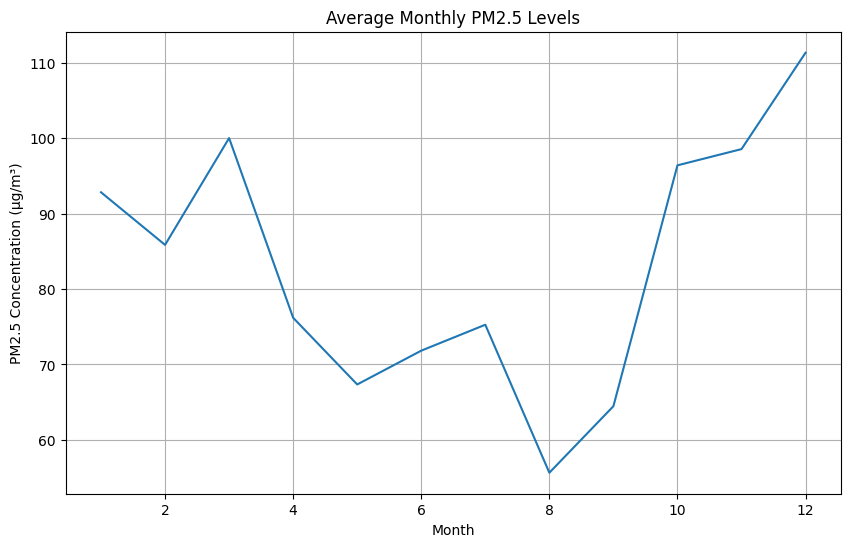

In [9]:
plt.figure(figsize=(10,6))
sns.lineplot(x=monthly_pm25.index, y=monthly_pm25.values)
plt.title("Average Monthly PM2.5 Levels")
plt.xlabel("Month")
plt.ylabel("PM2.5 Concentration (µg/m³)")
plt.grid(True)
plt.show()

**Insight:**
- Tren PM2.5 menunjukkan fluktuasi dengan puncaknya pada bulan-bulan musim dingin.

### Pertanyaan 2: Bagaimana faktor meteorologi seperti suhu (TEMP) dan kecepatan angin (WSPM) mempengaruhi kadar PM2.5?

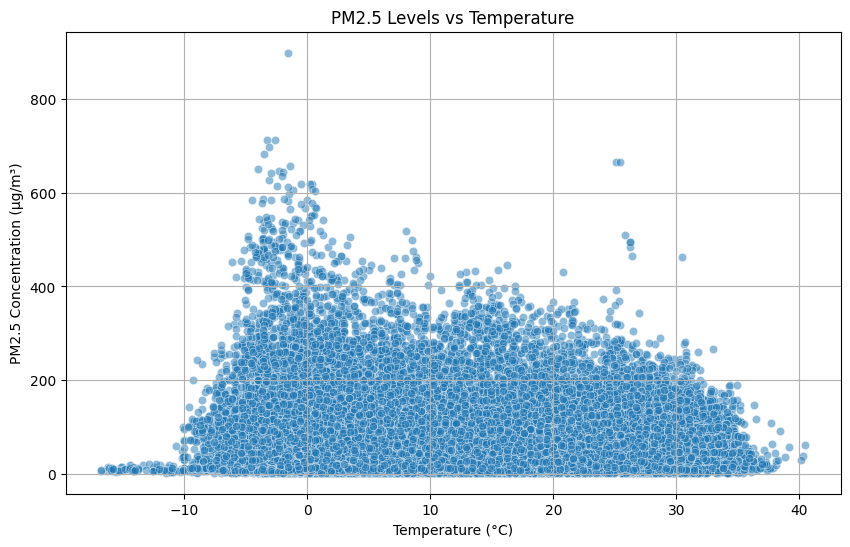

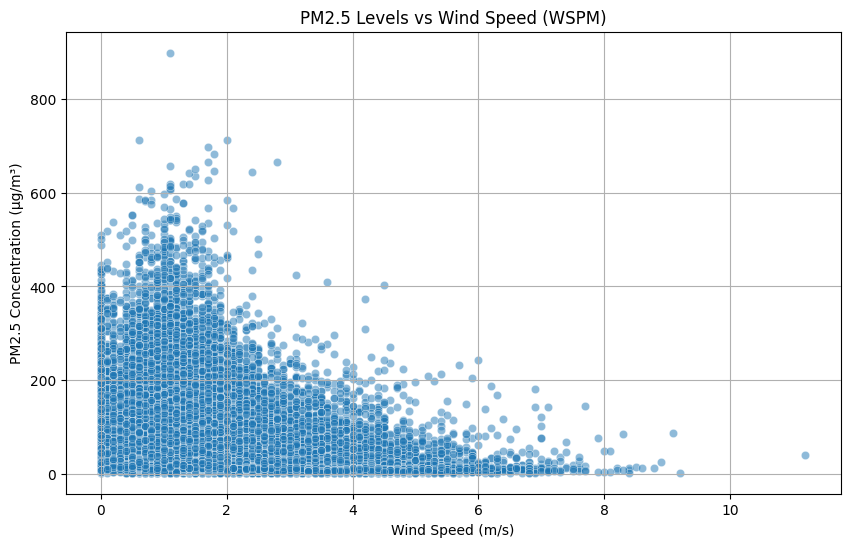

In [10]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=data['TEMP'], y=data['PM2.5'], alpha=0.5)
plt.title("PM2.5 Levels vs Temperature")
plt.xlabel("Temperature (°C)")
plt.ylabel("PM2.5 Concentration (µg/m³)")
plt.grid(True)
plt.show()

plt.figure(figsize=(10,6))
sns.scatterplot(x=data['WSPM'], y=data['PM2.5'], alpha=0.5)
plt.title("PM2.5 Levels vs Wind Speed (WSPM)")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("PM2.5 Concentration (µg/m³)")
plt.grid(True)
plt.show()

**Insight:**
- Terdapat korelasi negatif antara kecepatan angin (WSPM) dan konsentrasi PM2.5.
- Hubungan antara suhu dan PM2.5 cenderung lemah.

## Conclusion

- **Kesimpulan pertanyaan 1:** Kadar PM2.5 menunjukkan fluktuasi musiman, dengan puncak pada bulan-bulan musim dingin.
- **Kesimpulan pertanyaan 2:** Kecepatan angin memiliki pengaruh yang signifikan dalam menurunkan kadar PM2.5.